In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import colors
from PIL import Image
import napari
import skimage.io as io
import seaborn as sns
import pandas as pd
import colorcet as cc
import sys
import tifffile
from scipy import ndimage
from skimage.segmentation import find_boundaries

sys.path.append('..')
from spatialMI_functions import plot_layers_napari, crop_black_margins, plot_pixie_maps

import warnings
warnings.filterwarnings("ignore")


In [2]:
## Define color palettes for the different images

## Lunaphore images
channel_order = ["DAPI",
                 "TNNT2","ANKRD1","PDGFRa","CD31","aSMA",
                 "CD45","CCR2","TREM2","CD68","MPO"]
colorblind = sns.color_palette("colorblind")
glasbey = sns.color_palette(cc.glasbey)
comet_images_color = ['cyan',
                      glasbey[10],glasbey[7],glasbey[6],colorblind[3],glasbey[0],
                      glasbey[1],glasbey[2],glasbey[4],glasbey[12],"magenta"]

## Pixel maps
pixel_maps_color = sns.color_palette(cc.glasbey)

## Cell clusters
cell_cluster_color = sns.color_palette(cc.glasbey)

for color in comet_images_color:
    if color != "cyan":
        print(colors.to_hex(color))

#0000dd
#ffa52f
#6b004f
#d55e00
#d60000
#8c3bff
#018700
#97ff00
#a17569
#ff00ff


# Lunaphore background subtracted images

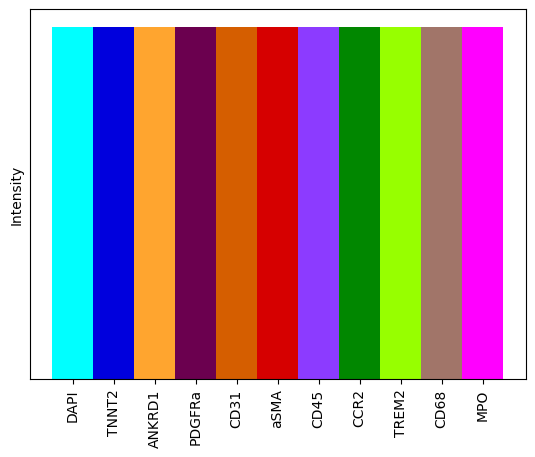

In [3]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot a bar for each channel with its corresponding color
for i, color in enumerate(comet_images_color):
    ax.bar(i, 1, color=color, width=1)

# Set the x-ticks and labels
ax.set_xticks(range(len(comet_images_color)))
ax.set_xticklabels(channel_order, rotation=90)

# Set the y-ticks and labels
ax.set_yticks([])
ax.set_ylabel('Intensity')

# Show the plot
plt.show()

## Full images

In [9]:
mantis_dir = "/Volumes/Luna_heart/Florian_MI/pixie/mantis"

contrast_limits_img = [[0, 30000],   # DAPI
                                  [0, 20000],   # TNNT2
                                  [0, 30000],   # ANKRD1
                                  [0, 30000],   # PDGFRa
                                  [0, 40000],   # CD31
                                  [0, 30000],   # aSMA
                                  [0, 30000],   # CD45
                                  [0, 30000],   # CCR2
                                  [0, 30000],   # TREM2
                                  [0, 30000],   # CD68
                                  [0, 30000]]  # MPO

# Iterate over all folders in mantis_dir
for folder in os.listdir(mantis_dir):
    print(folder)
    file_list = ["DAPI.tif","TNNT2.tif","ANKRD1.tif","PDGFRa.tif","CD31.tif",
                "aSMA.tif","CD45.tif","CCR2.tif","TREM2.tif","CD68.tif","MPO.tif"]
    # Load the first image to get the image shape
    first_image = io.imread(os.path.join(mantis_dir, folder, file_list[0]))
    image_shape = (len(file_list),) + first_image.shape

    # Create an empty array to hold the stacked images
    stacked_images = np.zeros(image_shape, dtype=first_image.dtype)

    ## Get roi for heart area
    roi = pd.read_csv(os.path.join(mantis_dir,folder, "roi.csv"),encoding = 'unicode_escape')

    # Iterate over all files in mantis_dir and stack them into the array
    for i, filename in enumerate(file_list):
        print(filename)
        image = io.imread(os.path.join(mantis_dir,folder, filename))
        stacked_images[i] = image

    plot_layers_napari(image = stacked_images,image_channel_axis = 0, image_channel_colors = comet_images_color, points_data = None,genes_of_interest = None,
        roi = roi, mask = None,pt_size=40,
        output_path = "../../output/seqIF/lunaphore_images/" + folder + "comet_image.figure3.png",
        scale_bar = True, font_size = 75, scale = 1, scalebar_length = 500, 
        img_type = "lunaphore",roi_plot = None, box_edge_thickness = 70,
        crop_out_path =  "../../output/seqIF/lunaphore_images/", sample = folder,
        image_contrast_limits = contrast_limits_img, channel_names=channel_order)


Control_14
DAPI.tif
TNNT2.tif
ANKRD1.tif
PDGFRa.tif
CD31.tif
aSMA.tif
CD45.tif
CCR2.tif
TREM2.tif
CD68.tif
MPO.tif


KeyboardInterrupt: 

: 

## Full image for 24h_83

In [30]:
mantis_dir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/mantis_channel_imgs"

contrast_limits_img = [[0, 65535],   # DAPI
                                  [0, 18000],   # TNNT2
                                  [0, 18000],   # ANKRD1
                                  [0, 20000],   # PDGFRa
                                  [0, 65535],   # CD31
                                  [0, 26000],   # aSMA
                                  [0, 10000],   # CD45
                                  [0, 30000],   # CCR2
                                  [0, 37000],   # TREM2
                                  [0, 18000],   # CD68
                                  [0, 37000]]  # MPO

file_list = ["DAPI.tif","TNNT2.tif","ANKRD1.tif","PDGFRa.tif","CD31.tif",
            "aSMA.tif","CD45.tif","CCR2.tif","TREM2.tif","CD68.tif","MPO.tif"]
# Load the first image to get the image shape
sample_dir = "24h_83"
first_image = io.imread(os.path.join(mantis_dir, sample_dir, file_list[0]))
image_shape = (len(file_list),) + first_image.shape

# Create an empty array to hold the stacked images
stacked_images = np.zeros(image_shape, dtype=first_image.dtype)

## Get roi for heart area
full_heart_roi = pd.read_csv(os.path.join(mantis_dir,sample_dir, "roi.csv"),encoding = 'unicode_escape')

# Iterate over all files in mantis_dir and stack them into the array
for i, filename in enumerate(file_list):
    print(filename)
    image = io.imread(os.path.join(mantis_dir,sample_dir, filename))
    stacked_images[i] = image

plot_layers_napari(image = stacked_images,image_channel_axis = 0, image_channel_colors = comet_images_color, points_data = None,genes_of_interest = None,
    roi = full_heart_roi, mask = None,pt_size=40,
    output_path = "../../output/seqIF/figure_3/" + sample_dir + "comet_image.24h_83.figure3.full_heart.png",
    scale_bar = True, font_size = 70 , scale = 2, scalebar_length = 500, 
    img_type = "lunaphore", roi_plot = None, box_edge_thickness = 70,
    crop_out_path =  "../../output/seqIF/figure_3/", sample = sample_dir,
    image_contrast_limits = contrast_limits_img, channel_names=channel_order)

DAPI.tif
TNNT2.tif
ANKRD1.tif
PDGFRa.tif
CD31.tif
aSMA.tif


KeyboardInterrupt: 

: 

## Zoom ins

In [18]:
## ROI blood vessel
if stacked_images is not None:
    img_scale = 5
    scalebar_length = 10
    font_size = 60

    ## First roi
    blood_vessel_roi = pd.read_csv("../../data/seqIF_regions_annotations/Figure3_regions/24h_83.vessel.csv",encoding = 'unicode_escape')
    plot_layers_napari(image = stacked_images,image_channel_axis = 0, image_channel_colors = comet_images_color, points_data = None,genes_of_interest = None,
    roi = blood_vessel_roi, mask = None,pt_size=40,
    output_path = "../../output/seqIF/figure_3/" + sample_dir + "comet_image.24h_83.figure3.blood_vessel.png",
    scale_bar = True, font_size = 60, scale = img_scale, scalebar_length = scalebar_length, 
    img_type = "blood_vessel_crop",roi_plot = None, box_edge_thickness = 70,
    crop_out_path =  "../../output/seqIF/figure_3/", sample = sample_dir,
    image_contrast_limits = contrast_limits_img, channel_names=channel_order)

        ## First roi
    endo_roi = pd.read_csv("../../data/seqIF_regions_annotations/Figure3_regions/24h_83.endo.csv",encoding = 'unicode_escape')
    plot_layers_napari(image = stacked_images,image_channel_axis = 0, image_channel_colors = comet_images_color, points_data = None,genes_of_interest = None,
    roi = endo_roi, mask = None,pt_size=40,
    output_path = "../../output/seqIF/figure_3/" + sample_dir + "comet_image.24h_83.figure3.endo.png",
    scale_bar = True,font_size = 60, scale = img_scale, scalebar_length = scalebar_length, 
    img_type = "endo_crop",roi_plot = None, box_edge_thickness = 70,
    crop_out_path =  "../../output/seqIF/figure_3/", sample = sample_dir,
    image_contrast_limits = contrast_limits_img, channel_names=channel_order)

# Pixel maps

In [4]:
# Assign each individual label in new_mask the corresponding color value from the color table
pixel_dir = '/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/subset_0.05_wseg'
sample_folder = pixel_dir + "/" + "Control_14" + "/"
pixel_categories = pd.read_csv(sample_folder + "population_pixel_mask.csv")
color_palette_use = pixel_maps_color[1:pixel_categories.shape[0]+1]
color_dict = {0: 'black'}
for i,region_id in enumerate(pixel_categories['region_id']):
    if pixel_categories['region_name'][i] == "background":
        color_dict[region_id] = "black"
    else:
        color_dict[region_id] = color_palette_use[i]
pixel_categories

,region_id,region_name
0,1,Ankrd1+
1,2,Mpo+
2,5,aSMA+
3,8,Pdgfra+
4,11,Cd45+
5,12,Ccr2+
6,17,Trem2+
7,18,Cd31+
8,20,Tnnt2+
9,24,Cd68+


In [5]:
## Count pixel categories
def count_pixel_clusters(image, sample_ID,pixel_categories):
    # Get unique intensity values and their counts
    unique, counts = np.unique(image, return_counts=True)
    pixel_cluster = pixel_categories['region_name'].to_numpy()
    pixel_cluster = pixel_cluster.astype(str)
    pixel_cluster = np.insert(pixel_cluster, 0, values="background")

    # Create a table with the counts for each intensity value
    table = pd.DataFrame({'Intensity': unique, "Pixel_cluster": pixel_cluster, 'Count': counts, 'Sample_ID': sample_ID})
    return table

In [7]:
viewer = napari.Viewer()
for folder in os.listdir(pixel_dir):
    if os.path.isdir(os.path.join(pixel_dir, folder)) and folder != "napari_screenshots":
        print(folder)
        # Do something with the folder here
        sample_folder = pixel_dir + "/" + folder + "/"
        pixel_img = tifffile.TiffFile(sample_folder + "population_pixel_mask.tiff").asarray()
        viewer.add_labels(pixel_img, visible=False, name=folder, opacity = 1, color = color_dict)

24-Aug-23 15:26:38 - bfio.backends - WARNING  - Java backend is not available. This could be due to a missing dependency (jpype).


Control_14
Control_13
Control_12
4h_97
24h_83
4h_96
24h_86
48h_79
48h_76


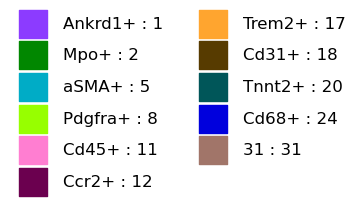

In [6]:
#### Generate heatmap for pixel cluster colors
## Create a new figure and a subplot (which contains the legend)
fig, ax = plt.subplots(figsize=(4, 2))

# # We will use a dummy scatter plot with square markers to create the legend
for (i, label) in enumerate(pixel_categories['region_name']):
    if label != 'background':
        ax.scatter([], [], color=color_palette_use[i], label=label + " : " + str(pixel_categories['region_id'][i]), marker='s', s=400)

# Create the legend
legend = ax.legend(loc='center', title='', fontsize='large', frameon=False, labelspacing=1, ncol=2)

# Hide the axes
ax.axis('off')

# Save the figure as a PDF file
output_path = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/subset_0.05_wseg/napari_screenshots/pixel_cluster_legend.pdf"
fig.savefig(output_path)

In [18]:
## Iterate over all FOVs
roi_dir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/heart_region_rois"

## Create an empty DataFrame to store the data
all_pixel_counts = pd.DataFrame()

for folder in os.listdir(pixel_dir):
    if os.path.isdir(os.path.join(pixel_dir, folder)) and folder != "napari_screenshots":
        print(folder)
        # Do something with the folder here
        sample_folder = pixel_dir + "/" + folder + "/"
        pixel_img = tifffile.TiffFile(sample_folder + "population_pixel_mask.tiff").asarray()
        ## Let's save a copy as 8bit of the original image
        outdir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/subset_0.05_wseg/napari_screenshots/"
        outdir_pixel_counts = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/subset_0.05_wseg/"
        ## Get roi for heart area
        roi = pd.read_csv(os.path.join(roi_dir, folder+"_heart.csv"),encoding = 'unicode_escape')
        outdir_screen = outdir + folder +".pixel_map.png"
        pixel_counts = count_pixel_clusters(pixel_img,folder,pixel_categories)
        #pixel_counts.to_csv(outdir_pixel_counts + folder+ ".pixel_cluster_counts.csv", index=False)
        all_pixel_counts = pd.concat([all_pixel_counts, pixel_counts], ignore_index=True) ## Concatenate the data to the main DataFrame
        # plot_pixie_maps(pixel_image = pixel_img, sample = folder,mask_color = color_dict,
        # scale = 5, screenshot_path = outdir_screen,crop_out_path = outdir, roi = roi)
## Write the data to a CSV file
all_pixel_counts.to_csv(outdir_pixel_counts + "pixel_counts.all_samples.csv", index=False)

Control_14
Control_13
Control_12
4h_97
24h_83
4h_96
24h_86
48h_79
48h_76


<Figure size 1500x1000 with 0 Axes>

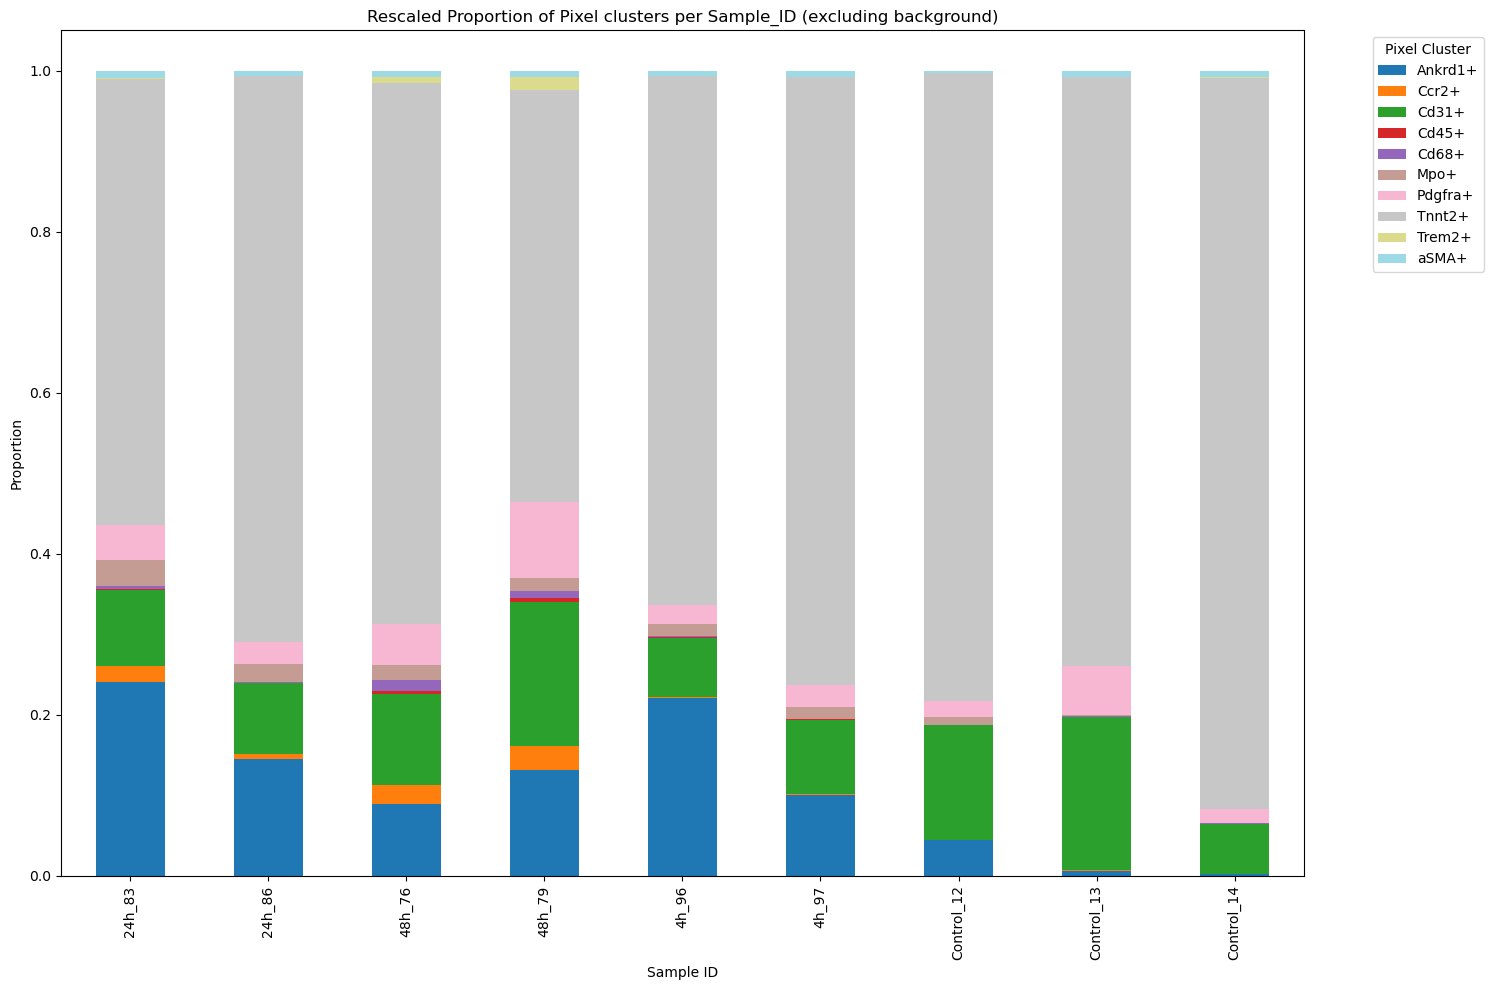

2023-08-24 14:55:14.308 python[39378:1880502] +[CATransaction synchronize] called within transaction
2023-08-24 14:55:17.574 python[39378:1880502] +[CATransaction synchronize] called within transaction
2023-08-24 14:55:17.838 python[39378:1880502] Warning: Window move completed without beginning


In [19]:
# Make a plot representing the proportion of different pixel clusters using the data in
# Aggregate any duplicate entries by summing their counts
aggregated_data = all_pixel_counts.groupby(['Pixel_cluster', 'Sample_ID'])['Count'].sum().reset_index()

# Pivot the aggregated data
pivot_data_count = aggregated_data.pivot(index='Pixel_cluster', columns='Sample_ID', values='Count')

# Calculate the total count for each Sample_ID
total_counts = pivot_data_count.sum()

# Calculate the proportions
pivot_data = pivot_data_count.divide(total_counts)

# Remove the 'background' row from the pivoted data
pivot_data_without_background = pivot_data.drop('background', axis=0)

# Recalculate the total proportion excluding 'background' for each sample
total_without_background = 1 - pivot_data.loc['background']

# Rescale the proportions by dividing by the new total for each sample
rescaled_data = pivot_data_without_background.divide(total_without_background)

# Plot the rescaled proportions in a stacked bar chart
plt.figure(figsize=(15, 10))
rescaled_data.T.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='tab20')

# Set title, labels, and legend
plt.title('Rescaled Proportion of Pixel clusters per Sample_ID (excluding background)')
plt.ylabel('Proportion')
plt.xlabel('Sample ID')
plt.legend(title='Pixel Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


# Cell cluster maps

In [5]:
# Assign each individual label in new_mask the corresponding color value from the color table
cell_directory = '/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05'
sample_folder = cell_directory + "/" + "Control_14" + "/"
cell_categories = pd.read_csv(sample_folder + "population_cell_mask.csv")


## Define color palette
channel_order = ["DAPI",
                 "TNNT2","ANKRD1","PDGFRa","CD31","aSMA",
                 "CD45","CCR2","TREM2","CD68","MPO"]
#color_palette_use = cell_cluster_color
color_palette_use = [glasbey[6], # Fibroblasts
                     glasbey[5], # Neutrophils
                     "black", # background
                    glasbey[2], # Ccr2+ macrophages
                    glasbey[0], # Smooth muscle cells
                    glasbey[4], # Macrophages Trem2+
                    glasbey[7], # Cardiomyocytes Ankrd1+
                    colorblind[3], # Endothelial cells
                    glasbey[1], # Other Leukocytes
                    glasbey[10], # Cardiomyocytes
                    "black", # out_of_mask
                    "magenta"] # Macrophages Trem2-




color_dict = {0: 'black'}
for i,region_id in enumerate(cell_categories['region_id']):
    if cell_categories['region_name'][i] == "background":
        color_dict[region_id] = "black"
    else:
        color_dict[region_id] = color_palette_use[i]
cell_categories
# translate colors in color_dict from rgb to hex
# for i,color in enumerate(color_palette_use):
#     if color != "black":
#         print(i,colors.to_hex(color))

,region_id,region_name
0,1,Fibroblasts
1,2,Neutrophils
2,3,background
3,4,Mono / Macros Ccr2+
4,7,Smooth muscle cells
5,8,Macrophages Trem2+
6,9,Cardiomyocytes Ankrd1+
7,10,Endothelial cells
8,13,Other Leukocytes
9,19,Cardiomyocytes


In [29]:
## Iterate over all FOVs
directory = '/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05'
roi_dir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/heart_region_rois"

for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, folder)) and folder != "napari_screenshots":
        if folder in ["Control_14","4h_97","24h_86","48h_79"]:
            print(folder)
            # Do something with the folder here
            roi = pd.read_csv(os.path.join(roi_dir,folder + "_heart.csv"),encoding = 'unicode_escape')
            sample_folder = directory + "/" + folder + "/"
            cell_cluster_img = io.imread(sample_folder + "population_cell_mask.tiff")
            outdir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05/napari_screenshots/"
            outdir_screen = outdir + folder +".cell_clusters.png"
            #cell_mask = tifffile.TiffFile(sample_folder + "cell_segmentation.tiff").asarray()
            #boundaries = find_boundaries(cell_mask, mode='thin')
            plot_pixie_maps(pixel_image = cell_cluster_img, sample = folder, mask_color = color_dict,
            scale = 5, screenshot_path = outdir_screen, crop_out_path = outdir, roi= roi)

Control_14
4h_97
24h_86
48h_79


In [9]:
## Show specific time points / samples
directory = '/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05'
roi_dir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/heart_region_rois"

for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, folder)) and folder != "napari_screenshots":
        if folder in ["48h_79","48h_76"]:
            print(folder)
            # Do something with the folder here
            roi = pd.read_csv(os.path.join(roi_dir,folder + "_heart.csv"),encoding = 'unicode_escape')
            sample_folder = directory + "/" + folder + "/"
            cell_cluster_img = io.imread(sample_folder + "population_cell_mask.tiff")
            outdir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05/napari_screenshots/"
            outdir_screen = outdir + folder +".cell_clusters.png"
            #cell_mask = tifffile.TiffFile(sample_folder + "cell_segmentation.tiff").asarray()
            #boundaries = find_boundaries(cell_mask, mode='thin')
            plot_pixie_maps(pixel_image = cell_cluster_img, sample = folder, mask_color = color_dict,
            scale = 5, screenshot_path = outdir_screen, crop_out_path = outdir, roi= roi)

48h_79
48h_76


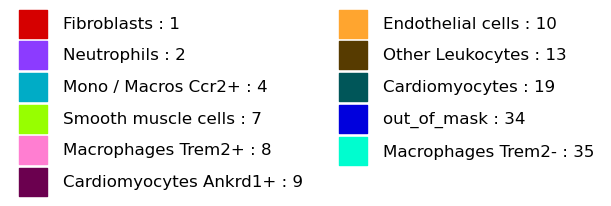

In [6]:
# #### Generate heatmap for pixel cluster colors
# ## Create a new figure and a subplot (which contains the legend)
# fig, ax = plt.subplots(figsize=(4, 2))

# # # We will use a dummy scatter plot with square markers to create the legend
# for (i, label) in enumerate(cell_categories['region_name']):
#     if label != 'background':
#         ax.scatter([], [], color=color_palette_use[i], label=str(label) + " : " + str(cell_categories['region_id'][i]), marker='s', s=400)

# # Create the legend
# legend = ax.legend(loc='center', title='', fontsize='large', frameon=False, labelspacing=1, ncol=2)

# # Hide the axes
# ax.axis('off')

# # Save the figure as a PDF file
# output_path = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05/cell_cluster_legend.pdf"
# fig.savefig(output_path)

In [5]:
# ## cluster labels with masks on top
# viewer = napari.Viewer()
# for folder in os.listdir(cell_directory):
#     if os.path.isdir(os.path.join(cell_directory, folder)) and folder != "napari_screenshots":
#         if folder in ["Control_14","4h_97","24h_86","48h_79"]:
#             print(folder)
#             # Do something with the folder here
#             sample_folder = cell_directory + "/" + folder + "/"
#             pixel_img = tifffile.TiffFile(sample_folder + "population_cell_mask.tiff").asarray()
#             cell_mask = tifffile.TiffFile(sample_folder + "cell_segmentation.tiff").asarray()
#             boundaries = find_boundaries(cell_mask, mode='thin')
#             viewer.add_labels(pixel_img, visible=False, name=folder, opacity = 1, color = color_dict)
#             viewer.add_labels(boundaries, visible=False, name=folder + "_mask", opacity = 1,color={0:'transparent', 1:(1,1,1)})

Control_14
4h_97
24h_86
48h_79


In [ ]:
# ## Iterate over all FOVs
# directory = '/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05'
# sample_folder = directory + "/" + "Control_12" + "/"
# pixel_categories = pd.read_csv(sample_folder + "population_cell_mask.csv")
# color_palette_use = sns.color_palette(cc.glasbey, n_colors=pixel_categories.shape[0]+1)[1:]

# # # Create a new figure and a subplot (which contains the legend)
# fig, ax = plt.subplots(figsize=(6, 2))

# # # We will use a dummy scatter plot with square markers to create the legend
# for (i, label) in enumerate(pixel_categories['region_name']):
#     if label != 'background':
#         ax.scatter([], [], color=color_palette_use[i], label=label, marker='s', s=400)

# # Create the legend
# legend = ax.legend(loc='center', title='', fontsize='large', frameon=False, labelspacing=1, ncol=2)

# # Hide the axes
# ax.axis('off')

# # Display the updated figure with square markers
# plt.show()

# # Save the figure as a PDF file
# output_path = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05/napari_screenshots/pixel_cluster_legend.pdf"
# fig.savefig(output_path)

# output_path

## Plots to highlight myeloid cell infiltration

In [27]:
# #color_palette_use = cell_cluster_color
# color_palette_use = ["grey", # Fibroblasts
#                      glasbey[5], # Neutrophils
#                      "black", # background
#                     glasbey[2], # Ccr2+ macrophages
#                     "grey", # Smooth muscle cells
#                     "grey", # Macrophages Trem2+
#                     glasbey[7], # Cardiomyocytes Ankrd1+
#                     "grey", # Endothelial cells
#                     "grey", # Other Leukocytes
#                     "grey", # Cardiomyocytes
#                     "black", # out_of_mask
#                     "magenta"] # Macrophages Trem2-

# color_dict = {0: 'black'}
# for i,region_id in enumerate(cell_categories['region_id']):
#     if cell_categories['region_name'][i] == "background":
#         color_dict[region_id] = "black"
#     else:
#         color_dict[region_id] = color_palette_use[i]
# color_dict

# ## Iterate over all FOVs
# directory = '/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05'
# roi_dir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/heart_region_rois"

# for folder in os.listdir(directory):
#     if os.path.isdir(os.path.join(directory, folder)) and folder != "napari_screenshots":
#         if folder in ["Control_14","4h_97","24h_86","48h_79"]:
#             print(folder)
#             # Do something with the folder here
#             roi = pd.read_csv(os.path.join(roi_dir,folder + "_heart.csv"),encoding = 'unicode_escape')
#             sample_folder = directory + "/" + folder + "/"
#             cell_cluster_img = io.imread(sample_folder + "population_cell_mask.tiff")
#             outdir = "/Users/florian_wuennemann/1_Projects/MI_project/Lunaphore/pixie/masked_subset/cell_masks_0.05/napari_screenshots/"
#             outdir_screen = outdir + folder +".myeloid_cells_highlight.png"
#             #cell_mask = tifffile.TiffFile(sample_folder + "cell_segmentation.tiff").asarray()
#             #boundaries = find_boundaries(cell_mask, mode='thin')
#             plot_pixie_maps(pixel_image = cell_cluster_img, sample = folder, mask_color = color_dict,
#             scale = 5, screenshot_path = outdir_screen, crop_out_path = outdir, roi= roi)

Control_14
4h_97
24h_86
48h_79
